In [33]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [8]:
#loading the data

results = pd.read_csv("../datasets/results.csv")
races = pd.read_csv("../datasets/races.csv")
drivers = pd.read_csv("../datasets/drivers.csv")
constructors = pd.read_csv("../datasets/constructors.csv")

In [11]:
#merging the data

df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on = 'raceId', how  = 'left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')

In [12]:
#drop columns

df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'], axis =1, inplace = True)

In [13]:
#rename columns

df.rename(columns={'rank':'fastestLapRank', 'name_x':'gpName', 'nationality_x':'driverNationality', 'name_y':'constructorName', 'nationality_y':'constructorNationality', 'driverRef':'driver'}, inplace = True)

In [15]:
#rearrange columns

df = df[['year', 'gpName', 'round', 'driver', 'constructorName', 'grid', 'positionOrder', 'points', 'time', 'milliseconds', 'fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'driverNationality', 'constructorNationality']]

In [18]:
#sort values

df = df.sort_values(by=['year', 'round', 'positionOrder'], ascending = [False, True, True])

In [19]:
#Replace \N values in time col

df.time.replace('\\N', np. nan, inplace=True)
df.milliseconds.replace('\\N', np. nan, inplace=True)
df.fastestLapRank.replace('\\N', np. nan, inplace=True)
df.fastestLapTime.replace('\\N', np.nan, inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace=True)

In [24]:
# change datatypes

df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [27]:
#reset index

df.reset_index(drop=True, inplace=True)

In [28]:
#shape

print(df.shape)

(26080, 15)


In [29]:
#info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    26080 non-null  int64  
 1   gpName                  26080 non-null  object 
 2   round                   26080 non-null  int64  
 3   driver                  26080 non-null  object 
 4   constructorName         26080 non-null  object 
 5   grid                    26080 non-null  int64  
 6   positionOrder           26080 non-null  int64  
 7   points                  26080 non-null  float64
 8   time                    7251 non-null   object 
 9   milliseconds            7250 non-null   float64
 10  fastestLapRank          7831 non-null   float64
 11  fastestLapTime          7615 non-null   object 
 12  fastestLapSpeed         7615 non-null   float64
 13  driverNationality       26080 non-null  object 
 14  constructorNationality  26080 non-null

In [30]:
#head

df.head(10)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723.0,7.0,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373.0,5.0,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788.0,14.0,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713.0,10.0,1:36.546,201.802,British,German
5,2023,Bahrain Grand Prix,1,stroll,Aston Martin,8,6,8.0,+54.502,5691238.0,9.0,1:36.546,201.802,Canadian,British
6,2023,Bahrain Grand Prix,1,russell,Mercedes,6,7,6.0,+55.873,5692609.0,17.0,1:37.221,200.401,British,German
7,2023,Bahrain Grand Prix,1,bottas,Alfa Romeo,12,8,4.0,+1:12.647,5709383.0,18.0,1:37.379,200.075,Finnish,Swiss
8,2023,Bahrain Grand Prix,1,gasly,Alpine F1 Team,20,9,2.0,+1:13.753,5710489.0,2.0,1:35.068,204.939,French,French
9,2023,Bahrain Grand Prix,1,albon,Williams,15,10,1.0,+1:29.774,5726510.0,15.0,1:37.144,200.559,Thai,British


In [35]:
sb.set_palette('Set3')

# Set the figure size
plt.rcParams['figure.figsize'] = (10, 6)

([], [])

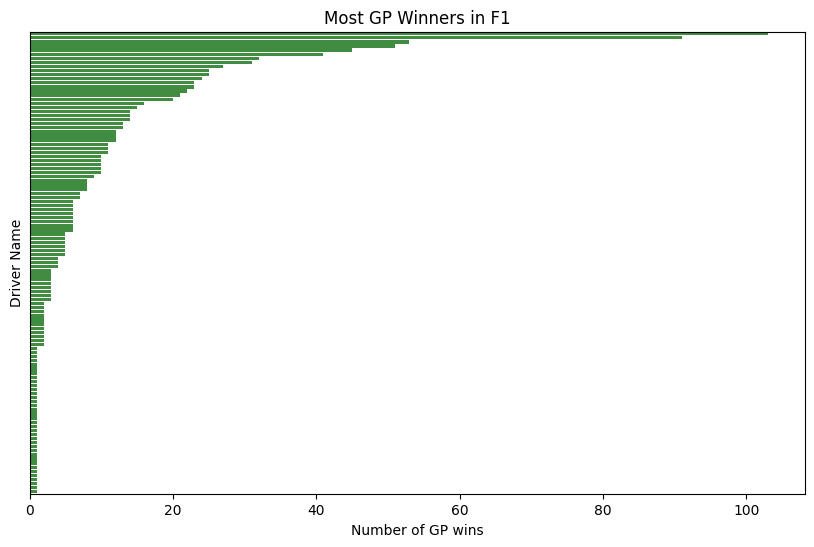

In [45]:
# GP winners

driverWinner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#Barplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


sb.barplot (data=driverWinner, y='driver', x='positionOrder', color='green', alpha=0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])


In [47]:
# create new dataframe of top 10 GP winners

top10Drivers = driverWinner.head(10)
print(top10Drivers)

               driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4      max_verstappen             45
5               senna             41
6              alonso             32
7             mansell             31
8             stewart             27
9               lauda             25


Text(0.5, 0, 'Number of GP wins')

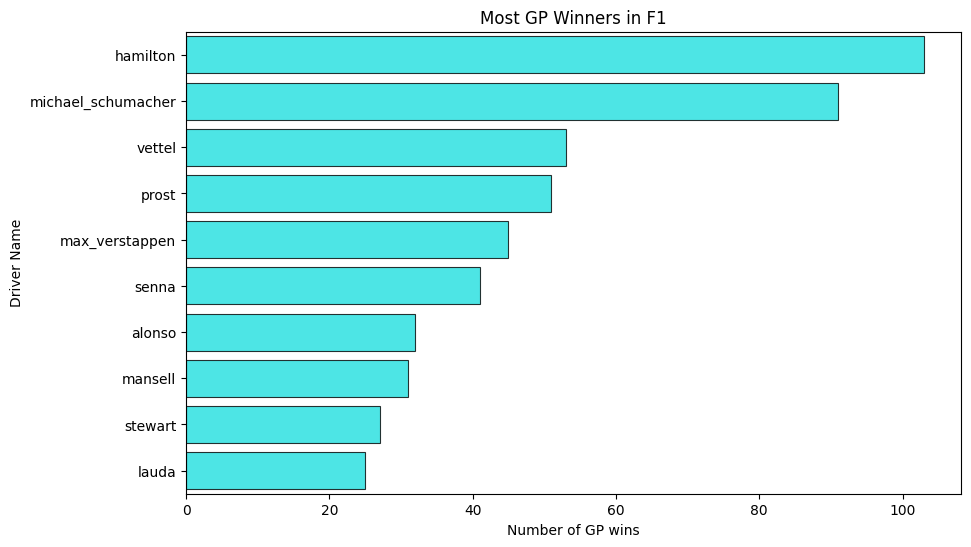

In [48]:
# Top 10 drivers plot

sb.barplot(data = top10Drivers, y='driver', x='positionOrder', color='cyan', alpha =0.8, linewidth=0.8, edgecolor='black')
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

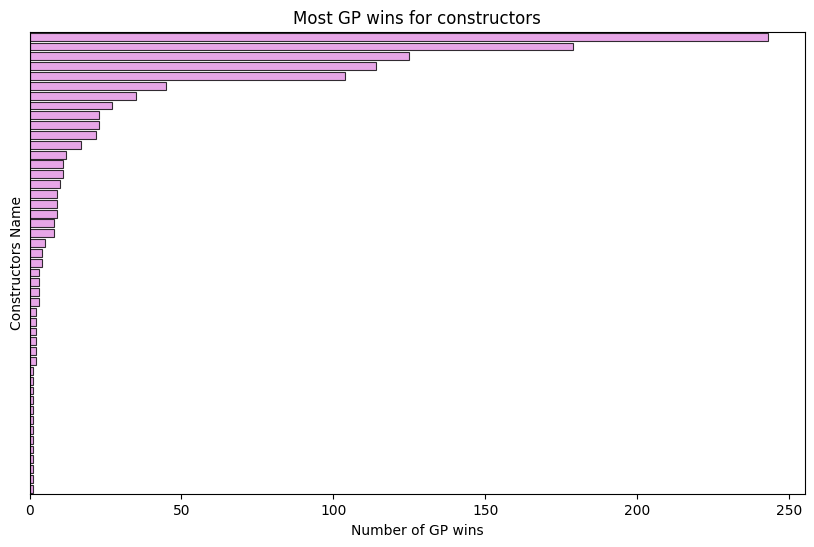

In [60]:
# GP constructor winners

constructorWinner = df.loc[df['positionOrder'] == 1].groupby('constructorName')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot

sb.barplot (data = constructorWinner, y = 'constructorName', x = 'positionOrder', color = 'violet', alpha=0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP wins for constructors')
plt.ylabel('Constructors Name')
plt.xlabel('Number of GP wins')
plt.yticks ([]);

In [86]:
# top 10 GP Constructor Winners

top10Constructors = constructorWinner.head(10)

print(top10Constructors)

  constructorName  positionOrder
0         Ferrari            243
1         McLaren            179
2        Mercedes            125
3        Williams            114
4        Red Bull            104
5      Team Lotus             45
6         Renault             35
7        Benetton             27
8         Brabham             23
9         Tyrrell             23


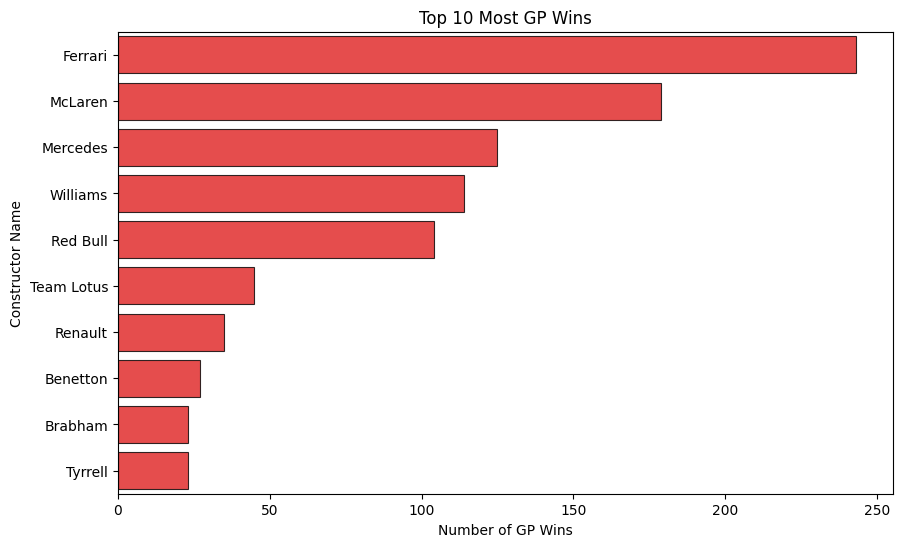

In [87]:
# Barplot of top 10 constructors

sb.barplot(data = top10Constructors, y='constructorName',x='positionOrder', color='red', alpha=0.8, linewidth=0.8, edgecolor='black');
plt.title('Top 10 Most GP Wins')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP Wins');

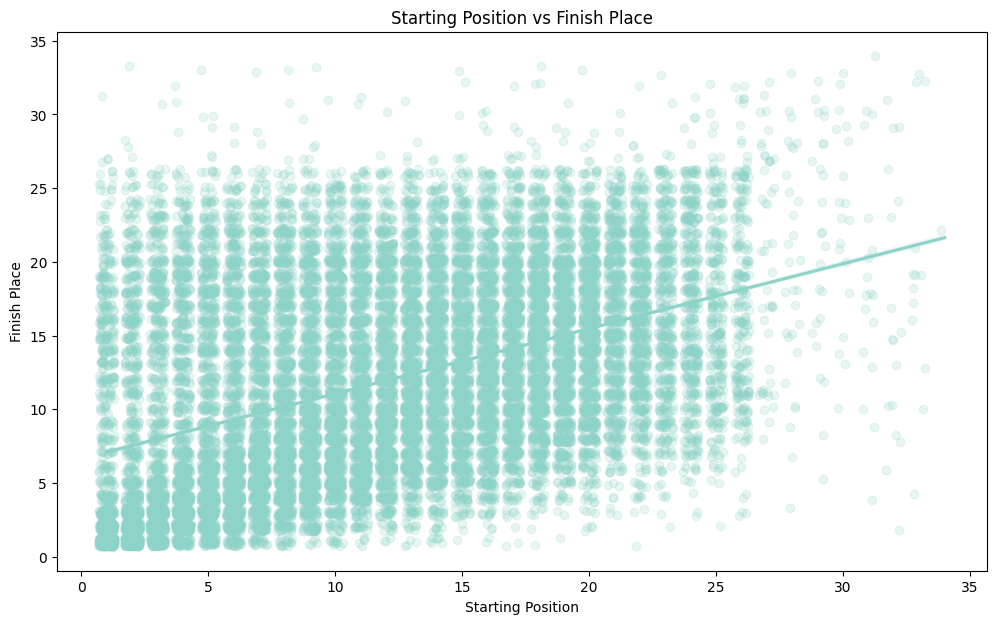

In [88]:
dfNoZero = df[df['grid']!=0]

# create a regression plot

plt.figure(figsize=[12,7])
sb.regplot(data=dfNoZero, x='grid', y='positionOrder', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':1/5});
plt.title('Starting Position vs Finish Place')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position');

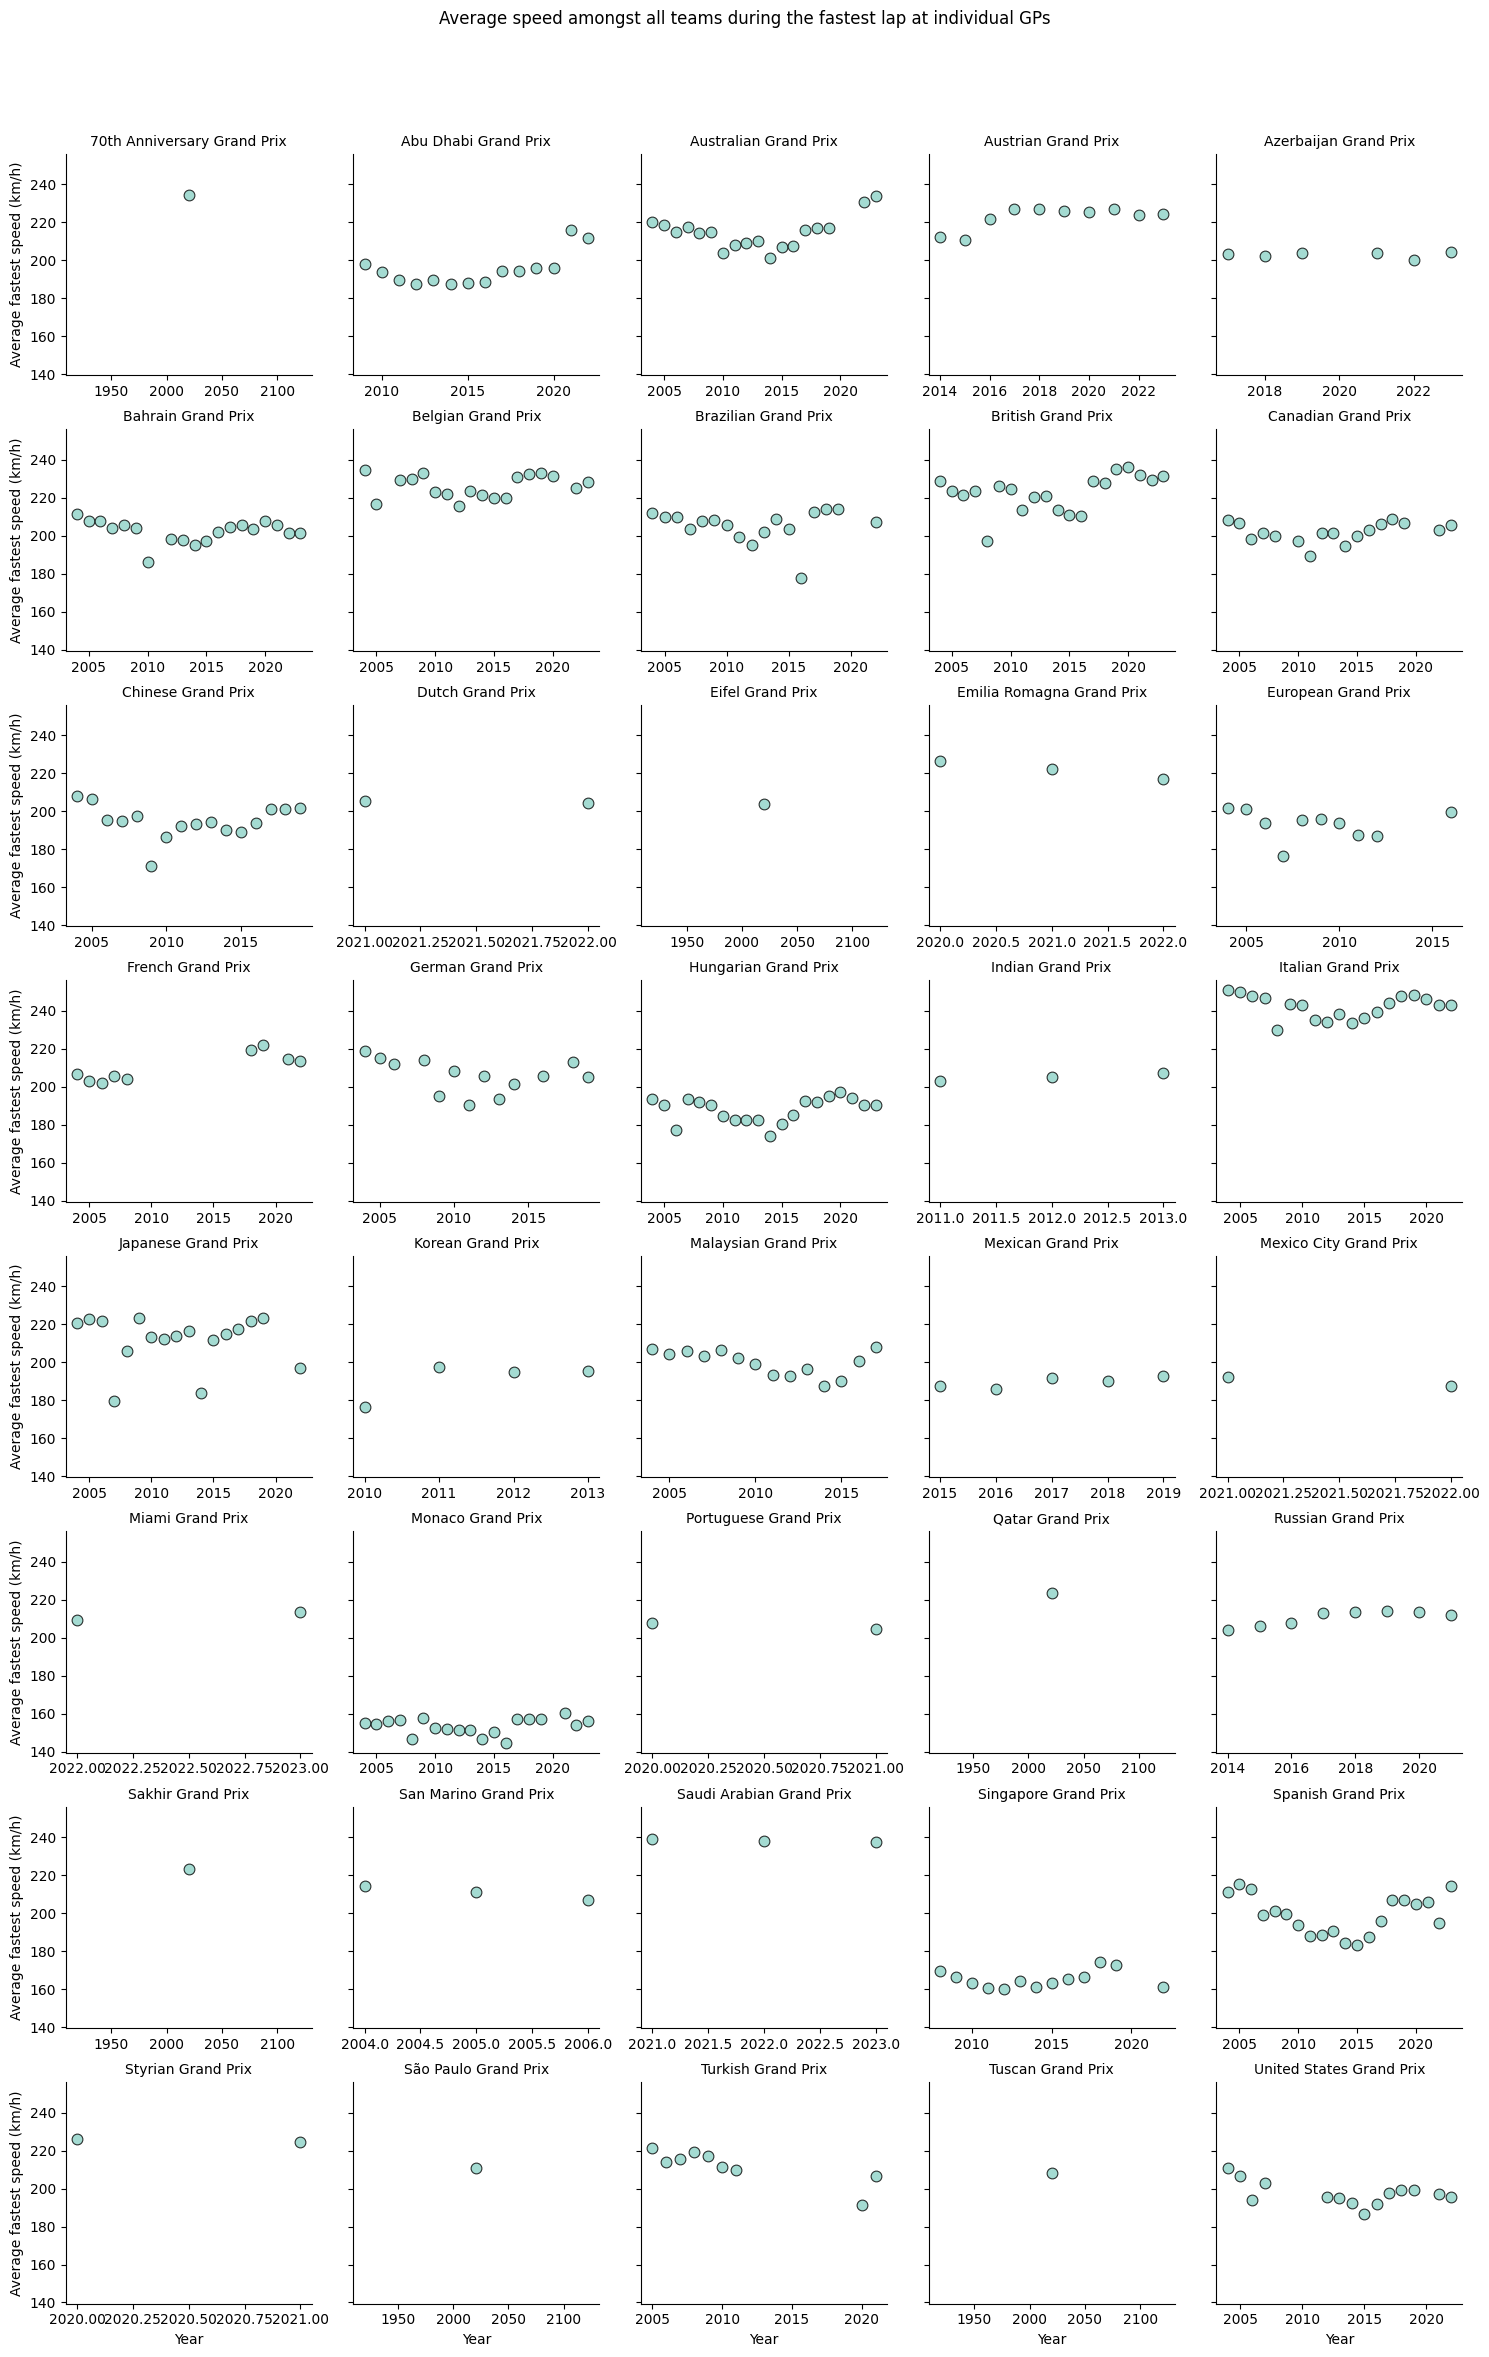

In [90]:
# create new data frame for seasons 2004 onwards

dfSpeed=df[df['year'] >= 2004]
dfGroupSpeed= dfSpeed.groupby(['gpName', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# create a facetgrid

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

g= sb.FacetGrid (data = dfGroupSpeed, col = 'gpName',col_wrap=5, sharex=False)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha = 0.8, linewidth=0.8, edgecolor="black", s = 60)
g.set_titles ("{col_name}")
g.set_xlabels ('Year')
g.set_ylabels ('Average fastest speed (km/h)')
# Adjust Plot Layout
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');
plt.show();

From the above output we can see a clear pattern of average speed of fastest laps increase with the rise of the hybrid engine era. Also, a clear relation of (average)speed can be seen with respect to the different tracks with Monaco GP being the slowest due to it being a twisty street circuit and Italian GP (Monza) and Belgian GP (Spa) being the fastest due to long straights.